## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [19]:
# Preliminaries

from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [14]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train[0].shape

(28, 28)

In [16]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
# What is the corresponding label in the training set?
y_train[333]

8

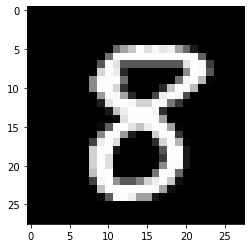

In [20]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [21]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [22]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [23]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [24]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [25]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [28]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 5ms/step - loss: 0.5138 - accuracy: 0.8468 - val_loss: 0.2019 - val_accuracy: 0.9401
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2525 - accuracy: 0.9261 - val_loss: 0.1573 - val_accuracy: 0.9515
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2022 - accuracy: 0.9405 - val_loss: 0.1385 - val_accuracy: 0.9597
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1742 - accuracy: 0.9483 - val_loss: 0.1178 - val_accuracy: 0.9657
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1601 - accuracy: 0.9534 - val_loss: 0.1129 - val_accuracy: 0.9676
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1460 - accuracy: 0.9575 - val_loss: 0.1087 - val_accuracy: 0.9676
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1364 - accuracy: 0.9602 - val_loss: 0.1032 - val_accuracy: 0.9710
Epoch 

In [29]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1035728007555008
Test accuracy: 0.9753999710083008


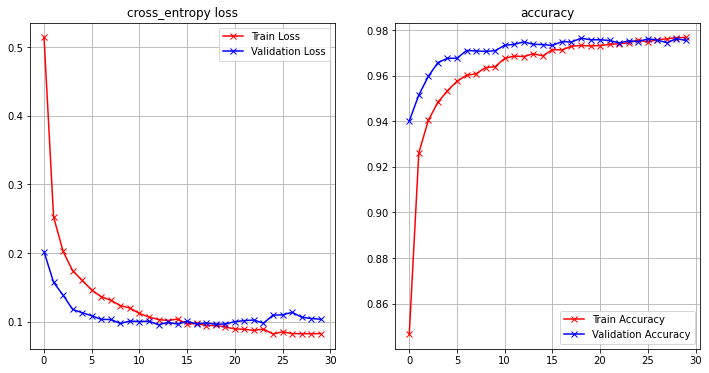

In [32]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [33]:
### Build your model here
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))
            
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [35]:
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])

batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 21ms/step - loss: 0.0529 - accuracy: 0.9872 - val_loss: 0.1148 - val_accuracy: 0.9818
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0530 - accuracy: 0.9872 - val_loss: 0.1087 - val_accuracy: 0.9810
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0510 - accuracy: 0.9883 - val_loss: 0.1039 - val_accuracy: 0.9833
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0482 - accuracy: 0.9880 - val_loss: 0.1144 - val_accuracy: 0.9831
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0441 - accuracy: 0.9885 - val_loss: 0.1110 - val_accuracy: 0.9826
Epoch 6/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0461 - accuracy: 0.9889 - val_loss: 0.1026 - val_accuracy: 0.9823
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0438 - accuracy: 0.9892 - val_loss: 0.1133 - val_accuracy: 0.98

Test loss: 0.1388033777475357
Test accuracy: 0.9832000136375427


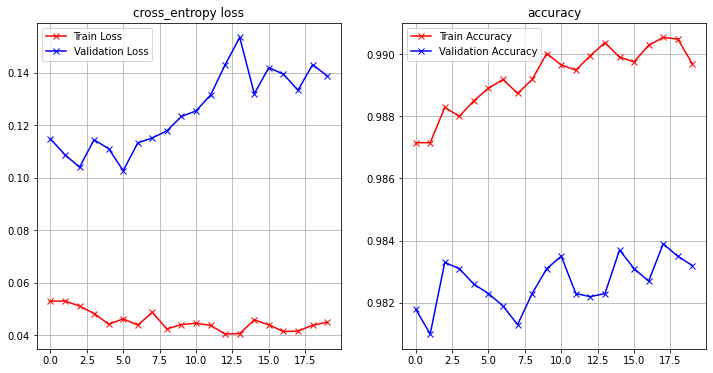

In [36]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?

## Answers: 

1) A curva do modelo 1 é mais balanceada que a do modelo 2, eu escolheria para produção o modelo 1 pois a curva de treinamento e de perda andam juntas enquanto o modelo 2 a curva de treino e perda tem uma grande diferença entre elas e apresentam uma margem de erro e acerto muito distante além das suas curvas possuirem overfiting para os dois casos.

2) No primeiro modelo a curva de perda e treinamento estão crescendo juntas, já no modelo 2 ocorre o oposto, a curva de perda e de treinamento se distanciam uma da outra. Ao aumentar muito o tamanho da camada, dobrar a taxa de desistência e reduzir o número de épocas a curva ganha caracteristicas de overfiting ou seja, a sua variância está elevada. Vale destacar que tanto a curva de perda e acurácia apresentam alta variância e no meu ponto de vista eu acho muito significativo que a curva de perda esteja baixa, pois com essa baixa os valores apresentados pela a curva de precisão serão mais acertíveis e válidos.

3) Redução no número do tamanho das camadas, aumentar o número de época e manter a taxa de desistência e a taxa de treinamento. Houve uma melhora, a curva não apresentou alta variância (as curvas não apresentaram um overfiting), entretanto houve um leve desbalanceamento no final entre as curvas de treinamento e perda.

In [49]:
model_3 = Sequential()
model_3.add(Dense(150, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(80, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation='softmax'))
            
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 150)               117750    
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 80)                12080     
_________________________________________________________________
dropout_13 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                810       
Total params: 130,640
Trainable params: 130,640
Non-trainable params: 0
_________________________________________________________________


In [50]:
learning_rate = .001
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])

batch_size = 128  # mini-batch with 128 examples
epochs = 50
history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.5167 - accuracy: 0.8410 - val_loss: 0.1955 - val_accuracy: 0.9394
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2590 - accuracy: 0.9244 - val_loss: 0.1452 - val_accuracy: 0.9576
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2047 - accuracy: 0.9418 - val_loss: 0.1232 - val_accuracy: 0.9645
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1806 - accuracy: 0.9491 - val_loss: 0.1086 - val_accuracy: 0.9670
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1601 - accuracy: 0.9549 - val_loss: 0.1072 - val_accuracy: 0.9707
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1534 - accuracy: 0.9562 - val_loss: 0.0991 - val_accuracy: 0.9731
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1434 - accuracy: 0.9603 - val_loss: 0.0976 - val_accuracy: 0.9735
Epoch 

Test loss: 0.15962733328342438
Test accuracy: 0.9779000282287598


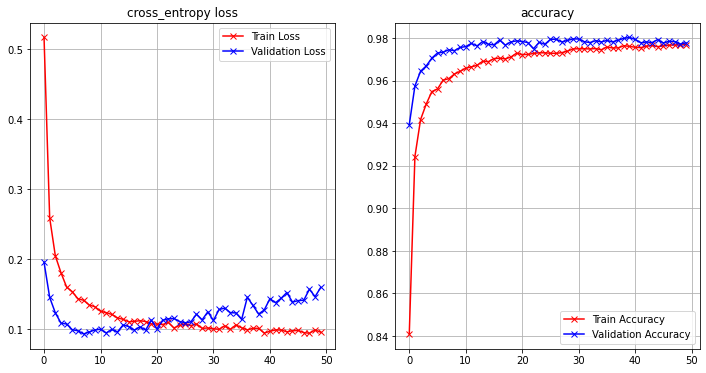

In [51]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)